In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from scipy.stats import mode

plt.style.use("seaborn-v0_8-muted")

# Data Inspection

In [2]:
# Set start and end date
start_date = "2021-29-09"
end_date = "2023-11-08"

In [3]:
# Helper function for plotting
def plot_date(df, data, y_name, x_name = "Date"):
    fig, ax = plt.subplots(2,1)
    ax[0].hist(df)
    ax[1].plot(df)
    ax[1].set_xlabel(x_name)
    ax[1].set_ylabel(y_name)
    
    # Format x axis
    date_form = DateFormatter("%b-%y")
    ax[1].xaxis.set_major_formatter(date_form)

    # Plot the mean, mode and median
    ax[0].axvline(data.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(data.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(mode(data).mode, color='purple', linestyle='dashed', linewidth=2, label='Mode')
    ax[0].legend()

# Consumer Price Index

In [4]:
# Import dataset

ppp = pd.read_csv("data/ppp.csv")

# Only keep values with base 2020
ppp = ppp[["Datum / Date", "2020-12-01 00:00:00"]].set_index("Datum / Date")


# Change column names
ppp.columns = ["PPP"]
ppp.rename_axis('Date', inplace = True)

# Convert to datetime
# Data represents values for the previous month. For example data for October was only available in November
ppp.index = pd.to_datetime(ppp.index, format = "%Y-%m-%d")
ppp.index = ppp.index + pd.offsets.MonthEnd(0)

# Clean the Data

In [5]:
# Inspect values
ppp.describe()

,PPP
count,26.000000
mean,104.350000
std,1.767088
min,101.300000
25%,103.075000
50%,104.600000
75%,106.000000
max,106.400000


In [6]:
# Check for missing values
ppp.isna().sum()

PPP    0
dtype: int64

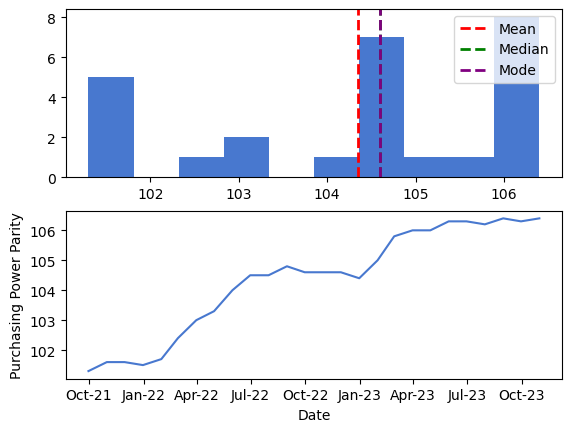

In [7]:
plot_date(ppp,ppp.PPP, "Purchasing Power Parity")

# Retail Trade Turnover

In [8]:
detail_handel = pd.read_csv("data/Detailhandel_rate.csv")

# Only keep nominal values, indizes and unadjusted values
detail_handel = detail_handel[(detail_handel["Nominal / Real"] == "Nominal") &
                                (detail_handel["Bereinigung"] == "Unbereinigt")&
                                (detail_handel["Indizes / Veränderungen"] == "Indizes")]
detail_handel = detail_handel[["Monat", "DATA"]]

# Rename columns
detail_handel.columns = ["Date", "Retail"]

# Convert to datetime
detail_handel.Date = pd.to_datetime(detail_handel.Date, format = "%Y-%m-%d")

# Data only becomes available at the end of the month
detail_handel["Date"] = detail_handel["Date"] + pd.offsets.MonthEnd(0)

# Set index
detail_handel.set_index("Date", inplace = True)

In [9]:
# Inspect data
detail_handel.describe()

,Retail
count,285.000000
mean,97.541568
std,11.008033
min,77.192000
25%,89.731000
50%,96.244000
75%,102.888000
max,135.381000


In [10]:
# Any missing values 
detail_handel.isna().sum()

Retail    0
dtype: int64

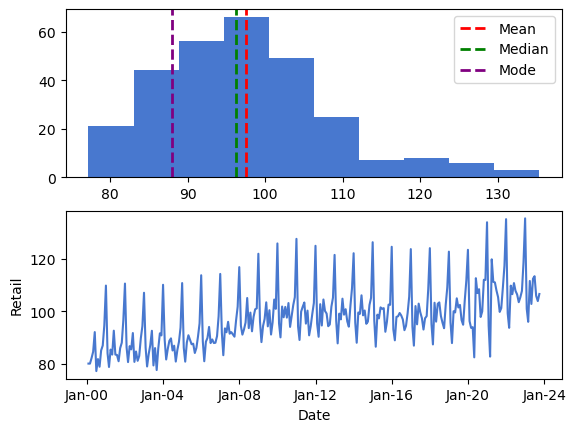

In [11]:
# Plot data to see any inconsistencies
plot_date(detail_handel, detail_handel.Retail, "Retail")

# Population

In [12]:
# Import dataset
population = pd.read_csv("data/Population.csv")

# Aggregate data to get the whole population
population = population.groupby("StichtagDat").agg({"AnzBestWir": "sum"})

# Change column names
population.columns = ["Population"]
population.rename_axis('Date', inplace = True)

# Convert to datetime
population.index = pd.to_datetime(population.index, format = "ISO8601")

In [13]:
# Inspect values
population.describe()

,Population
count,309.000000
mean,392752.343042
std,28001.344145
min,358593.000000
25%,365421.000000
50%,386091.000000
75%,418343.000000
max,446920.000000


In [14]:
# Check for missing values
population.isna().sum()

Population    0
dtype: int64

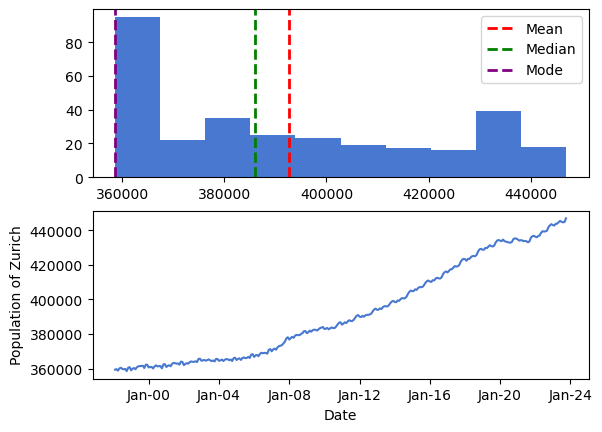

In [15]:
# Plot data to see any inconsistencies
plot_date(population,population.Population, "Population of Zurich")

# Traffic

In [16]:
traffic = pd.read_csv("data/traffic2021-2023.csv")

# Rename columns
traffic.columns = ["Date", "Traffic"]

# Convert to datetime
traffic.Date = pd.to_datetime(traffic.Date, format = "ISO8601")

# Set index
traffic.set_index("Date", inplace = True)

In [17]:
# Inspect data
traffic.describe()

,Traffic
count,24957.000000
mean,56026.889690
std,32328.297414
min,2936.000000
25%,24501.000000
50%,63276.000000
75%,83851.000000
max,115308.000000


In [18]:
# Check for missing values
traffic.isna().sum()

Traffic    0
dtype: int64

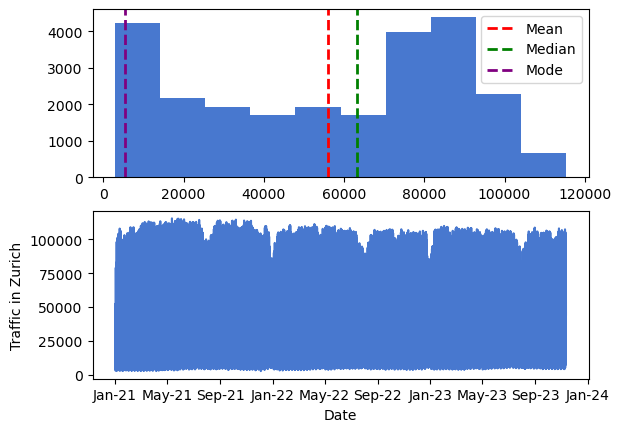

In [19]:
# Plot data to see any inconsistencies
plot_date(traffic,traffic.Traffic, "Traffic in Zurich")

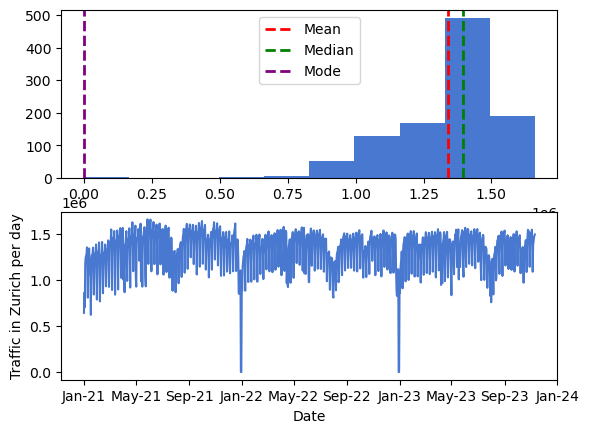

In [20]:
# Show by day
traffic_day = traffic.resample("D").sum()
plot_date(traffic_day,traffic_day.Traffic, "Traffic in Zurich per day")

In [21]:
# Show days where values are 0
traffic_day[traffic_day.Traffic == 0]

,Traffic
Date,
2021-12-30,0.0
2021-12-31,0.0
2022-12-30,0.0
2022-12-31,0.0


In [22]:
# Check if date included in Dataset
traffic[traffic.index == "2021-12-30"]

,Traffic
Date,


# Hotel guests

In [23]:
hotel = pd.read_csv("data/Hotel_guests.csv")

# Create Date Column
month_dict = {"Januar": 1, "Februar": 2, "März": 3, "April": 4, "Mai": 5, "Juni": 6,
              "Juli": 7, "August": 8, "September": 9, "Oktober": 10, "November": 11, "Dezember": 12}

hotel["Date"] = pd.to_datetime(hotel["Jahr"].astype(str) + "-"+ hotel["Monat"].map(month_dict).astype(str), 
                               format="%Y-%m")


hotel["Date"] = hotel["Date"] + pd.offsets.MonthEnd(0)

# Select relevant columns
hotel = hotel[["Date", "Total"]]

# Rename columns
hotel.columns = ["Date", "Guests"]

# Set index
hotel.set_index("Date", inplace = True)

# Make Guests to type int
hotel["Guests"] = hotel['Guests'].replace({' ': '', '\xa0': ''}, regex=True).astype(int)

# Sort by Data
hotel = hotel.sort_index()

In [24]:
# Inspect data
hotel.describe()

,Guests
count,369.000000
mean,202799.165312
std,64121.992109
min,13053.000000
25%,164048.000000
50%,194814.000000
75%,235997.000000
max,394143.000000


In [25]:
# Check for missing values
hotel.isna().sum()

Guests    0
dtype: int64

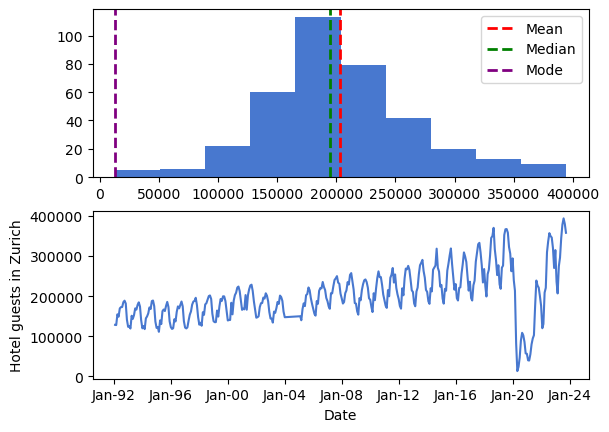

In [26]:
# Plot data to see any inconsistencies
plot_date(hotel,hotel.Guests, "Hotel guests in Zurich")

In [27]:
# Check for values with mode
hotel[hotel.Guests == mode(hotel.Guests).mode]

,Guests
Date,
2020-04-30,13053


# Sunshine

In [28]:
# Import dataset

weather = pd.read_csv("data/Sonnenstrahlen.csv")

# Select relevant columns
weather = weather[["Datum", "Wert"]]

# Change column names
weather.columns = ["Date", "Sunshine"]

weather.set_index("Date", inplace = True)

# Convert to datetime
weather.index = pd.to_datetime(weather.index, format = "ISO8601")

In [29]:
# Inspect data
weather.describe()

,Sunshine
count,18522.000000
mean,144.723648
std,232.916053
min,0.010000
25%,0.020000
50%,4.040000
75%,208.010000
max,976.180000


In [30]:
# Check for missing values
weather.isna().sum()

Sunshine    7
dtype: int64

In [31]:
# Show the missing dates
weather[weather.isna().Sunshine]

,Sunshine
Date,
2021-11-18 17:00:00,NaN
2022-06-30 11:00:00,NaN
2022-10-12 13:00:00,NaN
2023-01-13 13:00:00,NaN
2023-02-22 07:00:00,NaN
2023-02-22 14:00:00,NaN
2023-06-15 10:00:00,NaN


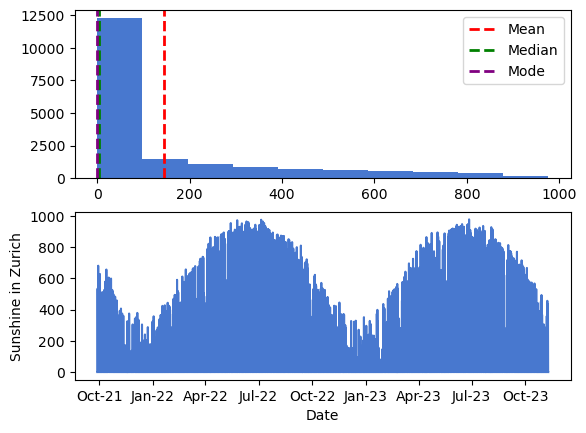

In [32]:
# Plot data to see any inconsistencies
plot_date(weather,weather.Sunshine, "Sunshine in Zurich")

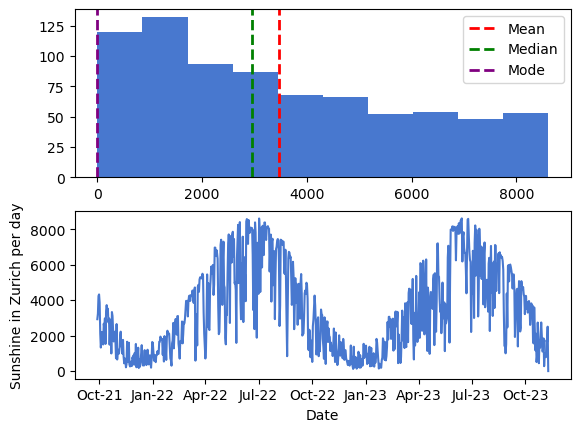

In [33]:
# Show by day
weather_day = weather.resample('D').sum()
plot_date(weather_day,weather_day.Sunshine, "Sunshine in Zurich per day")

# Data Imputation

In [34]:
# Helper function for adding data until the end date
def add_rows(current_date, df):
    # Add rows until the end date
    while current_date < pd.to_datetime(end_date):
        current_date += pd.DateOffset(days=1)
        new_row = pd.DataFrame(index= [current_date]) 
        df = pd.concat([df, new_row])
    df = df.ffill()
    return df

### Consumer Price Index

In [35]:
# Shift the data 1 month as data for current month only available at the start of the next month
ppp.index = ppp.index + pd.offsets.MonthBegin()

# Make the data hourly
# Use forward fill as data for the current month is only available at the end of the month 
ppp = ppp.resample("H").ffill()

# Add rows until the end date
ppp = add_rows(ppp.index.max(), ppp)

### Detailhandel

In [36]:
# Shift the data 1 month as data for current month only available at the start of the next month
detail_handel.index = detail_handel.index + pd.offsets.MonthBegin()

# Make the data hourly
# Use forward fill as data for the current month is only available at the end of the month 
detail_handel = detail_handel.resample("H").ffill()

# Add rows until the end date
detail_handel = add_rows(detail_handel.index.max(), detail_handel)

### Population

In [37]:
# Make the data daily. Use forward fill as data for the current month is only available at the end of the month (no data leakage)
population = population.resample("H").ffill()

# Add rows until the end date
population = add_rows(population.index.max(), population)

### Traffic

In [38]:
# Impute missing data for 30 and 31 December
# Inspect which date range to use to interpolate the mean
n = 10
target_date = "2021-12-30"

results = []

for days in range(1, n):
    start_date = pd.to_datetime(target_date) - pd.DateOffset(days=days)
    end_dates = pd.to_datetime(target_date) - pd.DateOffset(days=1)
    mean_values = traffic_day.loc[start_date:end_dates].mean()
    results.append(mean_values)

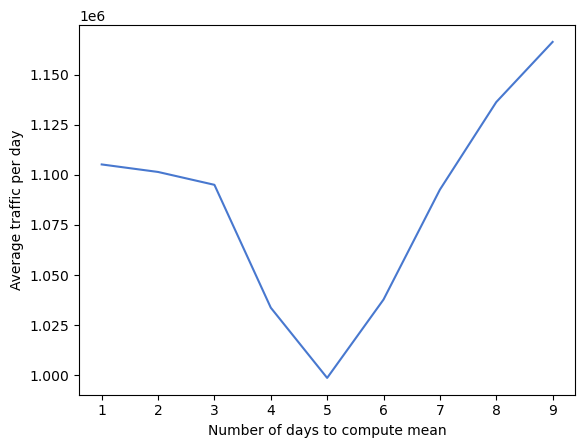

In [39]:
# Plot the results
fig, ax = plt.subplots()

x = np.linspace(1,n-1,n-1)
ax.plot(x, results)
ax.set_xlabel("Number of days to compute mean")
ax.set_ylabel("Average traffic per day");

In [40]:
# Get the data for the last day (29th December) and add it for 30th and 31st
day_before_2021 = traffic[(traffic.index.day == 29) & (traffic.index.month == 12) & (traffic.index.year == 2021)]
day_before_2021.index = day_before_2021.index + pd.DateOffset(days=1)
day_before_2021_31 = day_before_2021.copy()
day_before_2021_31.index = day_before_2021.index + pd.DateOffset(days=1)
values_2021 = pd.concat([day_before_2021, day_before_2021_31])

# For 2022 
day_before_2022 = traffic[(traffic.index.day == 29) & (traffic.index.month == 12) & (traffic.index.year == 2022)]
day_before_2022.index = day_before_2022.index + pd.DateOffset(days=1)
day_before_2022_31 = day_before_2022.copy()
day_before_2022_31.index = day_before_2022.index + pd.DateOffset(days=1)
values_2022 = pd.concat([day_before_2022, day_before_2022_31])

# Add to the data
traffic = pd.concat([traffic, values_2021, values_2022]).sort_values("Date")

In [41]:
# Shift the data two days in advance as data only becomes available two days after being measured
traffic.index = traffic.index + pd.DateOffset(days=2)

### Hotel guests

In [42]:
# Impute missing month with last year's monthly value
october = pd.DataFrame({"Guests": hotel.Guests.iloc[-1]}, index = [hotel.index[-1]+ pd.DateOffset(months=1)])
hotel = pd.concat([hotel, october]).sort_index()

# Add rows until the end date
#hotel = add_rows(hotel.index.max(), hotel)

In [43]:
# Shift the data 1 month as data for current month only available at the start of the next month
hotel.index = hotel.index + pd.offsets.MonthBegin()

# Make the data hourly
# Use forward fill as data for the current month is only available at the end of the month 
hotel = hotel.resample("H").ffill()

# Add rows until the end date
hotel = add_rows(hotel.index.max(), hotel)

### Sunshine

In [44]:
# Forward fill missing values as sunshine will not differ substantially by hour
weather = weather.sort_index().ffill()

# Shift the data by one hour as it only becomes available 30 min after the full hour
weather.index = weather.index + pd.DateOffset(hours=1)

### Concatenate data

In [45]:
features1 = pd.merge(ppp, population, left_index=True, right_index=True)
features2 = pd.merge(features1, hotel, left_index=True, right_index=True)
features3 = pd.merge(features2, traffic, left_index=True, right_index=True)
features4 = pd.merge(features3, weather, left_index=True, right_index=True)
features = pd.merge(features4, detail_handel, left_index=True, right_index=True)

In [47]:
# Save features
features.to_csv("features.csv")